# LangGraph 单节点示例

In [1]:
! pip install langgraph langsmith langchain-openai


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


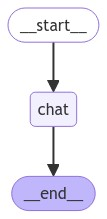

Assistant: 知道，百度是中国最大的搜索引擎和互联网公司之一，总部位于北京。它提供搜索引擎、在线社区、电子商务等多种服务，是中国人最常用的搜索引擎之一。
Goodbye!


In [3]:
# langgraph 简单示例
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph
from IPython.display import Image, display

llm = ChatOpenAI()

class State(TypedDict):
    messages: Annotated[list, add_messages]

def chat(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# 单节点
workflow = StateGraph(State)
workflow.add_node(chat)
workflow.set_entry_point("chat")
#workflow.add_edge("chat", "__end__")
workflow.set_finish_point("chat")
graph = workflow.compile()

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)